In [1]:
from PIL import Image
import pickle
import matplotlib.pyplot as plt
from wasserstein.texture_mixing import compute_3D_wavelets_coeffs, compute_wavelet_coeffs_barycenter, compute_sliced_wass_barycenter_pixels, approximate_projection


In [2]:
image1 = Image.open('data/Fur.jpg').resize((200, 200))
image2 = Image.open('data/Red.jpg').resize((200, 200))

## Compute $<f^j,\psi_{l,n}>$

In [4]:
coeff1 = compute_3D_wavelets_coeffs(image1)

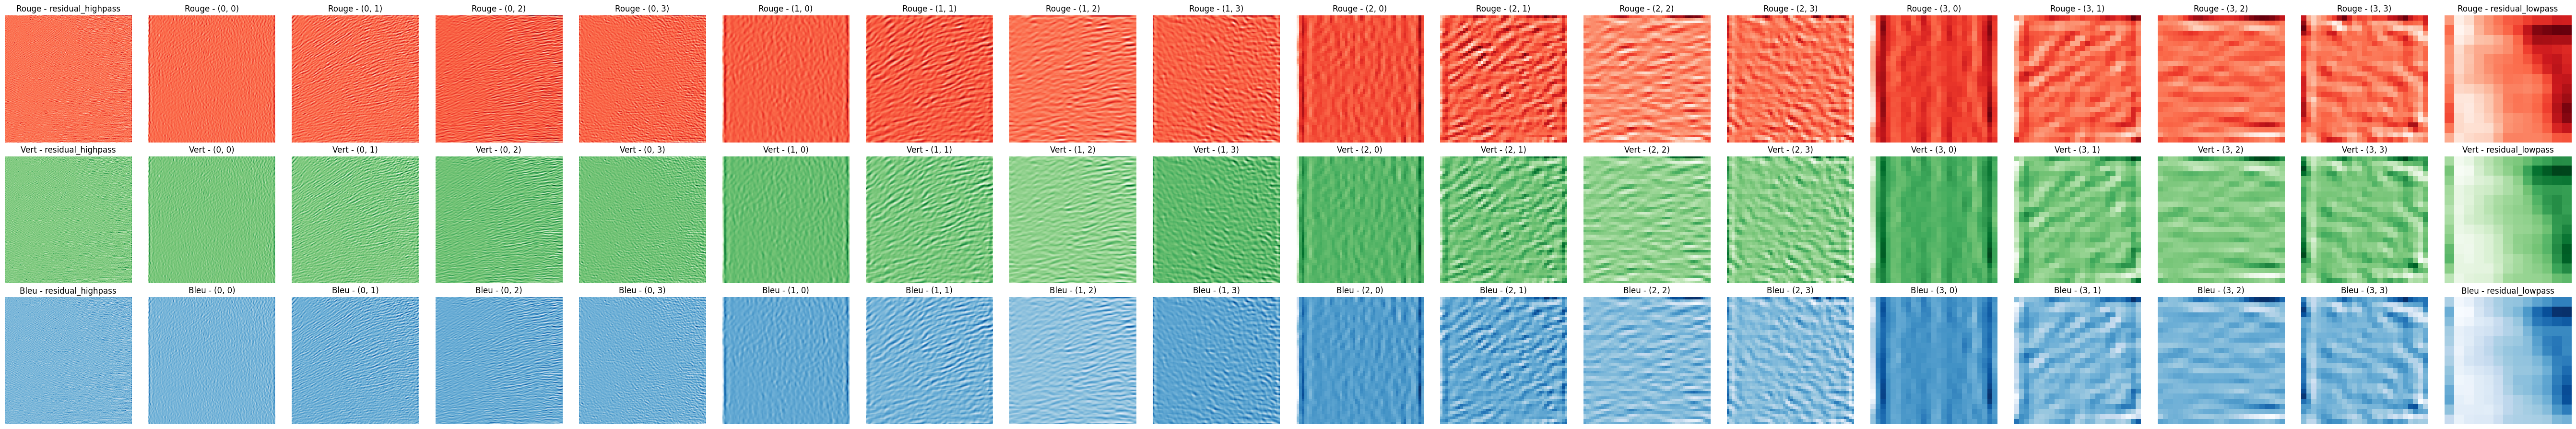

In [5]:
band_keys = list(coeff1['R'].keys())

# plots 
fig, axes = plt.subplots(3, len(band_keys), figsize=(3 * len(band_keys), 9))  # 3 lignes pour R, G, B ; colonnes = nombre de bandes

# afficher chaque sous-bande pour chaque canal
for i, band in enumerate(band_keys):
    axes[0, i].imshow(coeff1['R'][band], cmap='Reds')
    axes[0, i].set_title(f"Rouge - {band}")
    axes[0, i].axis('off')
    
    axes[1, i].imshow(coeff1['G'][band], cmap='Greens')
    axes[1, i].set_title(f"Vert - {band}")
    axes[1, i].axis('off')
    
    axes[2, i].imshow(coeff1['B'][band], cmap='Blues')
    axes[2, i].set_title(f"Bleu - {band}")
    axes[2, i].axis('off')

plt.tight_layout()
plt.show()

In [6]:
coeff2 = compute_3D_wavelets_coeffs(image2)

## Compute $Y_{l}$ 

In [3]:
#Y_l = compute_wavelet_coeffs_barycenter([image1, image2]) 

In [4]:
#Y_l

{'R': {'residual_highpass': array([[ 3.56550766, -0.20508053,  0.47195203, ..., -2.84524537,
          -0.62587304, -2.48757918],
         [ 2.18961668, -2.88178829, -4.54714095, ...,  2.15210771,
          -1.58792657,  1.45529608],
         [-1.52527967, -4.56609068,  0.58061446, ...,  0.39057228,
          -0.64926656, -1.43496249],
         ...,
         [ 1.16072006,  3.36325853,  0.73661934, ...,  0.33732083,
          -3.81830252, -0.43288139],
         [ 0.42559078,  0.40318244, -0.78333661, ...,  1.80363128,
           0.42664672,  3.3948048 ],
         [-4.34149749,  1.58937849,  2.43681048, ...,  0.34076601,
           0.81227314, -2.54741735]]),
  (0,
   0): array([[-2.5475927 , -1.11012317,  3.49814362, ..., -2.80885979,
          -1.29477697, -0.05857901],
         [-0.95833542, -1.61910069,  5.66002963, ...,  3.34101987,
          -2.26536568, -2.17867997],
         [ 1.59507173,  2.9801975 , -0.72424924, ..., -2.40663376,
          -3.77332835, -1.54689019],
         ..

In [7]:
def flatten_dict(d, parent_key='', sep='.'):
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [6]:
#flatten_dict(Y_l)

{'R.residual_highpass': array([[ 3.56550766, -0.20508053,  0.47195203, ..., -2.84524537,
         -0.62587304, -2.48757918],
        [ 2.18961668, -2.88178829, -4.54714095, ...,  2.15210771,
         -1.58792657,  1.45529608],
        [-1.52527967, -4.56609068,  0.58061446, ...,  0.39057228,
         -0.64926656, -1.43496249],
        ...,
        [ 1.16072006,  3.36325853,  0.73661934, ...,  0.33732083,
         -3.81830252, -0.43288139],
        [ 0.42559078,  0.40318244, -0.78333661, ...,  1.80363128,
          0.42664672,  3.3948048 ],
        [-4.34149749,  1.58937849,  2.43681048, ...,  0.34076601,
          0.81227314, -2.54741735]]),
 'R.(0, 0)': array([[-2.5475927 , -1.11012317,  3.49814362, ..., -2.80885979,
         -1.29477697, -0.05857901],
        [-0.95833542, -1.61910069,  5.66002963, ...,  3.34101987,
         -2.26536568, -2.17867997],
        [ 1.59507173,  2.9801975 , -0.72424924, ..., -2.40663376,
         -3.77332835, -1.54689019],
        ...,
        [-0.7519427

In [7]:
# Saving to a Pickle file
#with open('Yl.pkl', 'wb') as file:
    #pickle.dump(flatten_dict(Y_l), file)

In [13]:
with open('Yl.pkl', 'rb') as file:
        # Loading the data from the pickle file
        Y_l = pickle.load(file)

In [14]:
Y_l.keys()

dict_keys(['R.residual_highpass', 'R.(0, 0)', 'R.(0, 1)', 'R.(0, 2)', 'R.(0, 3)', 'R.(1, 0)', 'R.(1, 1)', 'R.(1, 2)', 'R.(1, 3)', 'R.(2, 0)', 'R.(2, 1)', 'R.(2, 2)', 'R.(2, 3)', 'R.(3, 0)', 'R.(3, 1)', 'R.(3, 2)', 'R.(3, 3)', 'R.residual_lowpass', 'G.residual_highpass', 'G.(0, 0)', 'G.(0, 1)', 'G.(0, 2)', 'G.(0, 3)', 'G.(1, 0)', 'G.(1, 1)', 'G.(1, 2)', 'G.(1, 3)', 'G.(2, 0)', 'G.(2, 1)', 'G.(2, 2)', 'G.(2, 3)', 'G.(3, 0)', 'G.(3, 1)', 'G.(3, 2)', 'G.(3, 3)', 'G.residual_lowpass', 'B.residual_highpass', 'B.(0, 0)', 'B.(0, 1)', 'B.(0, 2)', 'B.(0, 3)', 'B.(1, 0)', 'B.(1, 1)', 'B.(1, 2)', 'B.(1, 3)', 'B.(2, 0)', 'B.(2, 1)', 'B.(2, 2)', 'B.(2, 3)', 'B.(3, 0)', 'B.(3, 1)', 'B.(3, 2)', 'B.(3, 3)', 'B.residual_lowpass'])

## Compute Y

In [8]:
Y = compute_sliced_wass_barycenter_pixels([image1, image2])

TypeError: 'Image' object is not subscriptable